In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing

from hierarchical_clustering import hierarchical_clustering

In [2]:
def generate_random_data(num_points: int, num_features: int) -> np.ndarray:
    """generate random data of size num_points x num_features

    Parameters
    ----------
    num_points : int
        number of points
    num_features : int
        number of features

    Returns
    -------
    np.ndarray
        random data
    """
    return np.random.rand(num_points, num_features)


def is_hierarchy_equal(Z_result, Z_expected) -> bool:
    """checks if the linkage matrix is equal to the expected result.
    The function uses the allclose function from numpy to compare the two matrices to
    prevent rounding errors.

    Parameters
    ----------
    Z_result : np.array
        computed linkage matrix to compare for correctness of the result
    Z_expected : np.array
        expected linkage matrix. The result should be equal to this matrix.

    Returns
    -------
    bool
        Result if the linkage matrix is equal to the expected result and if the hierarchy is correct.
    """
    # check if the merged clusters are the same both operations are needed in case the indices are swapped
    # also checks that cluster 1 and 2 are not the same
    cluster_1_correct = np.logical_or(
        Z_result[:, 0] == Z_expected[:, 0], Z_result[:, 0] == Z_expected[:, 1]
    )
    cluster_2_correct = np.logical_or(
        Z_result[:, 1] == Z_expected[:, 0], Z_result[:, 1] == Z_expected[:, 1]
    )
    clusters_are_not_same = np.logical_not(Z_result[:, 0] == Z_result[:, 1])

    all_clusters_are_correct = np.all(
        np.logical_and(cluster_1_correct, cluster_2_correct, clusters_are_not_same)
    )
    all_costs_are_correct = np.allclose(Z_result[:, 2], Z_expected[:, 2])
    all_numbers_of_observations_are_correct = np.allclose(
        Z_result[:, 3], Z_expected[:, 3]
    )

    return (
        all_clusters_are_correct
        and all_costs_are_correct
        and all_numbers_of_observations_are_correct
    )


def plot_hierarchical_clusterings(linkage_matrices: list, titles: list) -> None:
    """plots the dendrograms of the linkage matrices in a row to compare the results. The function uses the
    dendrogram function from scipy to plot the dendrograms and matplotlib to plot the dendrograms in a row.

    Parameters
    ----------
    linkage_matrices : list
        list of linkage matrices to plot
    titles : list
        titles of the plotted dendrograms
    """
    fig, axes = plt.subplots(1, len(linkage_matrices), figsize=(15, 5))
    for axis, linkage_matrix, title in zip(axes, linkage_matrices, titles):
        dendrogram(linkage_matrix, ax=axis)
        axis.set_title(title)

    plt.show()

In [3]:
df = pd.read_csv("CC_GENERAL.csv")

df = df.drop("CUST_ID", axis=1)

# Fill missing values with the previous value https://www.kaggle.com/code/vipulgandhi/hierarchical-clustering-explanation/notebook
df.fillna(method="ffill", inplace=True)

credit_card_data = df.to_numpy()
scalar = preprocessing.MinMaxScaler().fit(credit_card_data)
normalized_credit_card_data = scalar.transform(credit_card_data)

print(f"Shape of the data: {credit_card_data.shape}")

df.head(10)

Shape of the data: (8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
iterations = 2
dimension = 2
starting_number = 100
end_at_size = 1000
step_size = 100

ns = np.array(range(starting_number, end_at_size + 1, step_size))

result_scipy = []
result_hierarchical_clustering = []
results_hierarchical_clustering_MST = []
time_scipy = np.zeros((len(ns), iterations))
time_hierarchical = np.zeros((len(ns), iterations))
time_hierarchical_MST = np.zeros((len(ns), iterations))

for index, number_data_points in enumerate(ns):
    data = generate_random_data(number_data_points, dimension)
    for iteration in range(iterations):

        start = time()
        linkage_matrix = linkage(data, method="single", metric="euclidean")
        end = time()
        time_scipy[index, iteration] = end - start

        start = time()
        linkage_matrix_result = hierarchical_clustering(data)
        end = time()
        time_hierarchical[index, iteration] = end - start

        assert is_hierarchy_equal(linkage_matrix, linkage_matrix_result)

        start = time()
        linkage_matrix_result_MST = hierarchical_clustering(data, type="MST")
        end = time()

        time_hierarchical_MST[index, iteration] = end - start

        assert is_hierarchy_equal(linkage_matrix, linkage_matrix_result_MST)

        result_scipy.append(linkage_matrix)
        result_hierarchical_clustering.append(linkage_matrix_result)
        results_hierarchical_clustering_MST.append(linkage_matrix_result_MST)

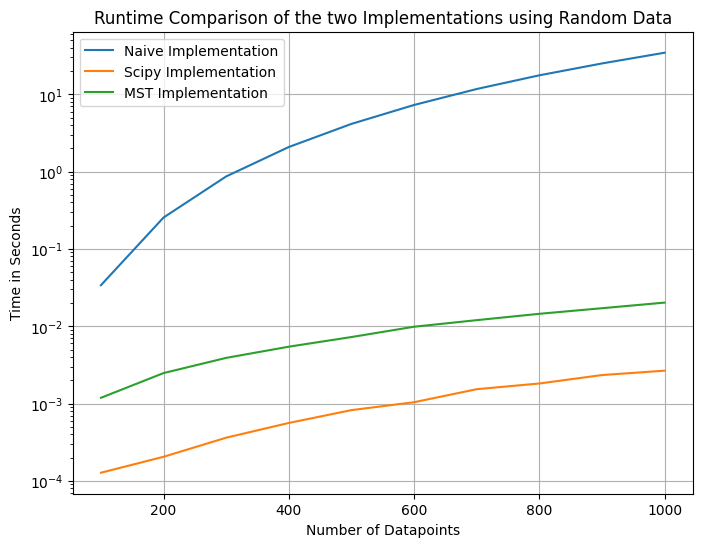

In [5]:
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.plot(
    ns,
    np.mean(time_hierarchical, axis=1),
    label="Naive Implementation",
)
ax.plot(
    ns,
    np.mean(time_scipy, axis=1),
    label="Scipy Implementation",
)

ax.plot(ns, np.mean(time_hierarchical_MST, axis=1), label="MST Implementation")

ax.set_xlabel("Number of Datapoints")
ax.set_ylabel("Time in Seconds")
ax.set_title("Runtime Comparison of the two Implementations using Random Data")
ax.set_yscale("log")
ax.legend()
ax.grid()
plt.show()

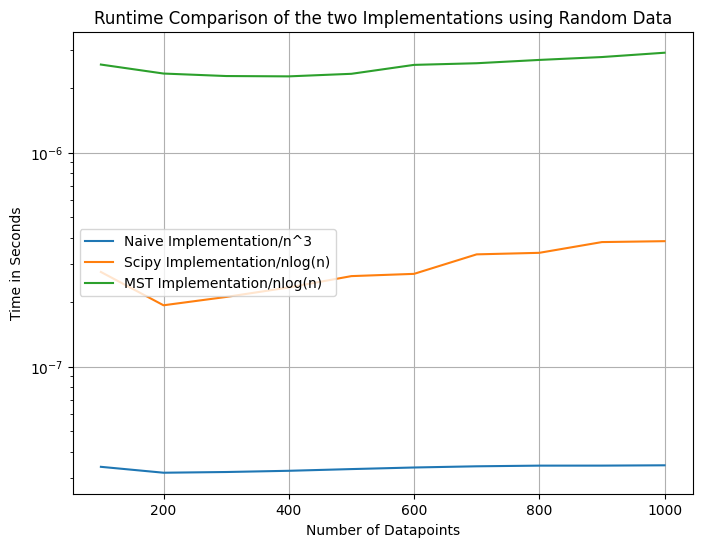

In [6]:
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.plot(
    ns,
    np.mean(time_hierarchical, axis=1) / np.power(ns, 3),
    label="Naive Implementation/n^3",
)

ax.plot(
    ns,
    np.mean(time_scipy, axis=1) / (ns * np.log(ns)),
    label="Scipy Implementation/nlog(n)",
)

ax.plot(
    ns,
    np.mean(time_hierarchical_MST, axis=1) / (ns * np.log(ns)),
    label="MST Implementation/nlog(n)",
)

ax.set_xlabel("Number of Datapoints")
ax.set_ylabel("Time in Seconds")
ax.set_title("Runtime Comparison of the two Implementations using Random Data")
ax.set_yscale("log")
ax.legend()
ax.grid()
plt.show()